In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
tweets_csv = pd.read_csv("startups/tweets.csv")

We count how many tweets are related to what funding round.

In [17]:
from collections import Counter
Counter(tweets_csv.Series)

Counter({'_Series_B': 173305, '_Series_A': 91071, '_Series_C': 90223, '_Series_D': 33135, nan: 113})

Now we compute lists of number of likes, number of retweets, and range of dates. (Range of dates = among our 200 or so tweets, how many dates do they span? If they span a lot of dates, that means tweets are made quite infrequently.)

Here, the purpose of get_num_first is to convert strings of integers and associated text we get from scraping (e.g. '5 Likes') into integers (e.g. 5).


In [ ]:
def get_num_first(text):
    try:
        return int(text.split()[0])
    except:
        return 0

In [82]:
likes = tweets_csv.apply(lambda row: get_num_first(row[2]), axis=1)
retweets = tweets_csv.apply(lambda row: get_num_first(row[4]), axis=1)

In [93]:
dates = tweets_csv.apply(lambda row: get_date(row[7]), axis=1)

When we scrape the date tweeted, we get string. We use Python's datetime library to convert it to datetime object. This will help us manipulating dates (counting, computing ranges, etc.) later.

In [90]:
from datetime import datetime
def get_date(text):
    try:
        return datetime.date(datetime.strptime(text, '%d %b %Y'))
    except:
        return 0

We create a brand new data frame with likes and retweets replaced by integers, and dates replaced by a bunch of datetime objects. Other columns are the same.

In [150]:
tweets_df = pd.DataFrame({    
                  'company_name': tweets_csv['Company'], 
                  'tweeter_href': tweets_csv['Href'],
                  'likes'       : likes,
                  'tweeter_name': tweets_csv['Name'],
                  'retweets'    : retweets,
                  'Series'      : tweets_csv['Series'],
                  'text'        : tweets_csv['Text'],
                  'date'        : dates
             })

There are 2088 startups right now.

In [290]:
len(tweets_df.company_name.unique())

2088

In [248]:
# drop all the missing values
tweets_df = tweets_df[tweets_df['text'].notnull()]
tweets_df = tweets_df[tweets_df['date'] != 0] # we mark 0 above for missing dates


In [263]:
tweets_df['text_length'] = tweets_df['text'].apply(lambda text: len(text))

In [232]:
tweet_count = tweets_df.groupby(['company_name','Series']).likes.count()

In [281]:
# count @ (person tags) and # (hashtags) and links (http...)
def get_tags(text):
    persontags = []
    hashtags = []
    links = []
    wordlist = text.split()
    for word in wordlist:
        if len(word) >= 2 and word[0] == '@':
            persontags.append(word)
        if len(word) >= 2 and word[0] == '#':
            hashtags.append(word)
        if len(word) >= 5 and word.startswith('http'):
            links.append(word)
    return {'persontags': persontags, 'hashtags': hashtags, 'links': links}
        
    

In [284]:
tweets_df['persontags'] = tweets_df['text'].apply(lambda text: get_tags(text)['persontags'])
tweets_df['hashtags'] = tweets_df['text'].apply(lambda text: get_tags(text)['hashtags'])
tweets_df['links'] = tweets_df['text'].apply(lambda text: get_tags(text)['links'])
tweets_df['persontags_count'] = tweets_df['text'].apply(lambda text: len(get_tags(text)['persontags']))
tweets_df['hashtags_count'] = tweets_df['text'].apply(lambda text: len(get_tags(text)['hashtags']))
tweets_df['links_count'] = tweets_df['text'].apply(lambda text: len(get_tags(text)['links']))

In [238]:
likes_mean = tweets_df.groupby(['company_name','Series']).likes.mean()
retweets_mean = tweets_df.groupby(['company_name','Series']).retweets.mean()

(array([  3.62600000e+03,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0.        ,   8.37580645,  16.7516129 ,  25.12741935,
         33.50322581,  41.87903226,  50.25483871,  58.63064516,
         67.00645161,  75.38225806,  83.75806452]),
 <a list of 10 Patch objects>)

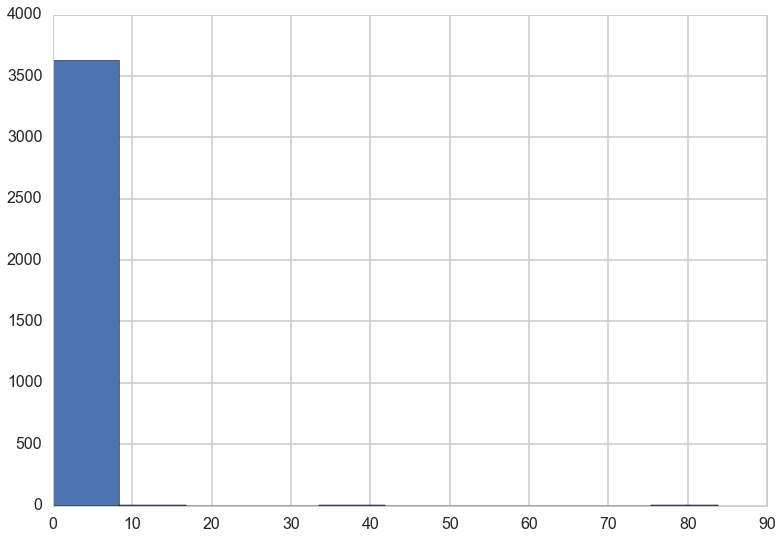

In [236]:
plt.hist(likes_count)

In [113]:
# drop rows with null values
tweets_df = tweets_df[tweets_df.text.notnull()]
tweets_df = tweets_df[tweets_df.date != 0]

In [118]:
tweets_df['text_length'] = [len(text) for text in tweets_df.text]

In [178]:
mean_groupby = tweets_df.groupby(['company_name','Series']).mean()

In [191]:
count_groupby = tweets_df.groupby(['company_name','Series']).likes.count()

In [210]:
count_groupby = pd.DataFrame(count_groupby)
count_groupby.columns = ['count']

In [180]:
count = tweets_df.groupby(['company_name','Series']).count()['date']

In [154]:
funding_csv = pd.read_csv('startups/funding.csv')

In [155]:
funding_csv.head()

,Description,Market,Names,No_Stage_Amount,No_Stage_Date,Pitch,Seed_Amount,Seed_Date,Series_A_Amount,Series_A_Date,Series_B_Amount,Series_B_Date,Series_C_Amount,Series_C_Date,Series_D_Amount,Series_D_Date,Stage
0,NaN,Cable,Epic-Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$13,000,000","Nov 13, 2012","$30,000,000","Jul 30, 2014",NaN,NaN,Series C
1,NaN,All Students,Apreso-Classroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$15,000,000","Oct 14, 2008",NaN,NaN,NaN,NaN,Series B
2,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,NaN,NaN,Effective and Secure Offline to Mobile experie...,"$750,000","Mar 25, 2012","$1,600,000","Aug 15, 2013",Unknown,"Jan 20, 2015",NaN,NaN,NaN,NaN,Series B
3,NaN,Food Processing,Onshift,"$7,000,000","Feb 3, 2014",NaN,NaN,NaN,NaN,NaN,"$3,000,000","Feb 2, 2012",NaN,NaN,NaN,NaN,Series C
4,NaN,-,Xendex-Holding,NaN,NaN,NaN,NaN,NaN,Unknown,"Jun 25, 2008","$3,500,000","Nov 30, 2009",NaN,NaN,NaN,NaN,Series A
